In [230]:
import csv
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import os
from datetime import datetime
import bisect 
import re

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [269]:
def scanLog(csvlogpath, txt_to_search, txt_field, printit = False):
    with open(csvlogpath) as csvfile:
        print('SCANNING ' + csvlogpath)
        reader = csv.DictReader(csvfile)
        count = 0
        data = []
        
        for row in reader:
            is_ok = False
            for i in range(len(txt_field)):
                
                pattern = re.compile(txt_to_search[i])
                if pattern.match(row[txt_field[i]]):
                    is_ok = True
            
            if is_ok:
                count += 1
                
                my_val = {}
                for i in range(len(txt_field)):
                    my_val[txt_field[i]] = row[txt_field[i]]
                data.append(my_val)
            
        return {'count': count, 'value': data}
    
def plotLines(data,opt = {}):
    for d in data:
        my_color = None
        if 'color' in opt:
            if d in opt['color']:
                my_color = opt['color'][d]

        my_width = None
        if 'width' in opt:
            if d in opt['width']:
                my_width = opt['width'][d]
    
        plt.plot(data[d]['x'],data[d]['y'], label=d, color=my_color, linewidth=my_width)
    return plt
    

In [270]:
def buildData(txt_list, txt_field_list, csvpath):
    data = {'x':[],'y':[]}
    for filename in os.listdir(csvpath):
        if filename.endswith(".csv"): 
            csvlogpath = csvpath+filename
            scanner = scanLog(csvlogpath,txt_list, txt_field_list)
            date = filename.replace("oc-", "").replace(".csv", "")

            date_val = datetime.strptime(date, '%Y-%m')
            bisect.insort(data['x'],date_val) 
            ord_index = data['x'].index(date_val)
            data['y'].insert(ord_index,scanner['count'])
            data['value'] = scanner['value']
        else:
            continue
        
    return data

In [ ]:
csvpath = '/Users/ivan.heibi/opencitations/sci_framework/log_data/csv/'
#TIME,REMOTE_ADDR,HTTP_USER_AGENT,HTTP_REFERER(from),HTTP_HOST,REQUEST_URI(to)

In [286]:
#General usage of each different service
alldata = {}

In [288]:
alldata['OSCAR'] = buildData(['.*(/search)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [289]:
alldata['LUCINDA'] = buildData(['.*(/browse)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [290]:
alldata['RAMOSE'] = buildData(['.*(/api)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


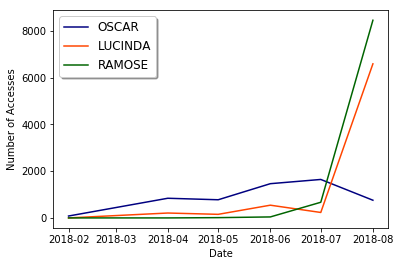

In [291]:
my_plt = plotLines(alldata,opt = {'color':{'OSCAR':'navy','LUCINDA':'orangered','RAMOSE':'darkgreen'}})
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.show()

In [164]:
data_moves = {}
data_moves['OSCAR_to_LUCINDA'] = buildData(['/search','/browse'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [165]:
#data_moves['LUCINDA_to_LUCINDA'] = buildData(['/browse','/browse'], ['HTTP_REFERER','REQUEST_URI'], csvpath)

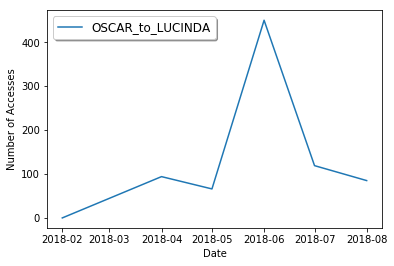

In [174]:
my_plt = plotLines(data_moves)
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.show()

In [273]:
#Using All services with COCI and OCC
data_corpus = {}

In [277]:
data_corpus['COCI'] = buildData([".*(coci\/search|coci\/browse|coci\/api)"], ["REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [274]:
data_corpus['OCC'] = buildData(["^(\/search|\/browse|\/api)"], ["REQUEST_URI"], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


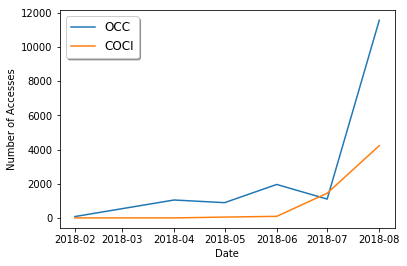

In [278]:
my_plt = plotLines(data_corpus)
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.show()

In [279]:
# COCI with every single service
data_coci = {}

In [280]:
data_coci['OSCAR'] = buildData(['.*(/coci/search)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [282]:
data_coci['LUCINDA'] = buildData(['.*(/coci/browse)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


In [283]:
data_coci['RAMOSE'] = buildData(['.*(/coci/api)'], ['REQUEST_URI'], csvpath)

SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-04.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-05.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-07.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-06.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-02.csv
SCANNING /Users/ivan.heibi/opencitations/sci_framework/log_data/csv/oc-2018-08.csv


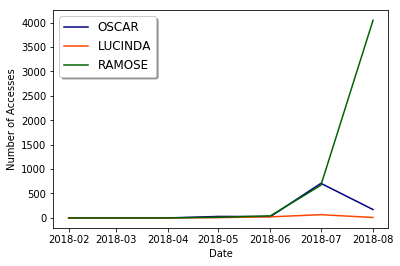

In [284]:
my_plt = plotLines(data_coci,opt = {'color':{'OSCAR':'navy','LUCINDA':'orangered','RAMOSE':'darkgreen'}})
my_plt.legend(loc='upper left', shadow=True, fontsize='large')
my_plt.ylabel('Number of Accesses')
my_plt.xlabel('Date')
my_plt.show()